In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# load image dataset: blue/red dots in circles
# train_X, train_Y, test_X, test_Y = load_dataset()

### Loading the dataset

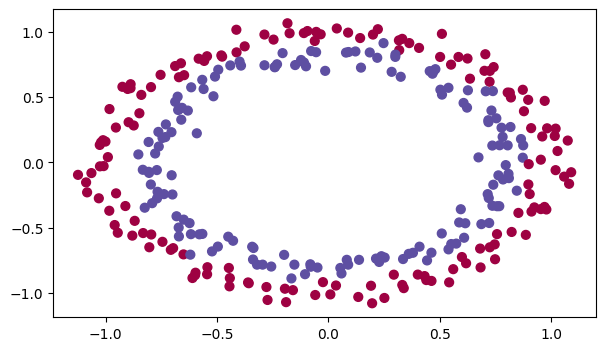

In [2]:
train_X, train_Y, test_X, test_Y = load_dataset()

In [3]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
  
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

### Zero Initialization

In [4]:
def initialize_parameters_zeros(layers_dims):

    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
    return parameters

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


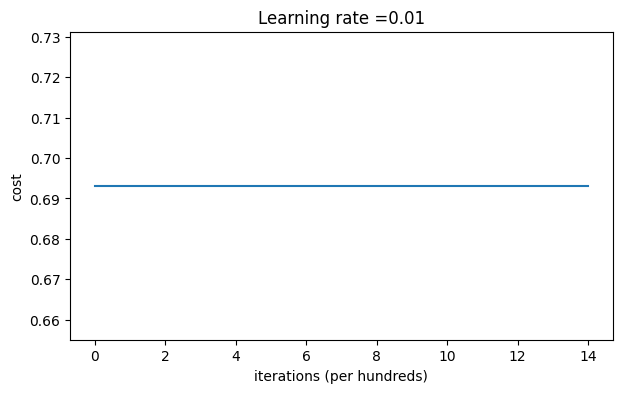

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [5]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


In [6]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


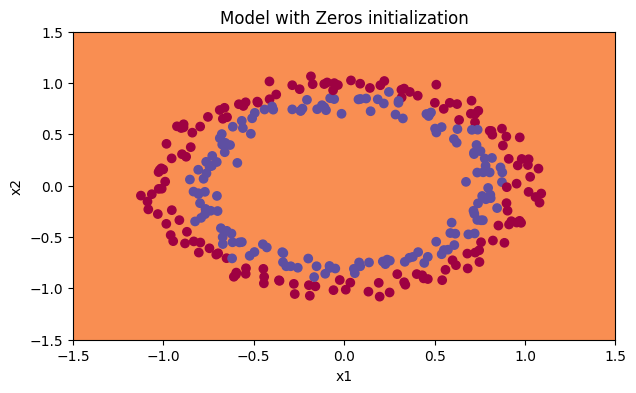

In [7]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### Random Initialization

In [8]:
def initialize_parameters_random(layers_dims):
  
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*10
        parameters['b' +str(l)] = np.zeros((layers_dims[l], 1))

    return parameters

c:\Users\isthi\OneDrive\Documents\Python no Jutsu\Initializing_Parameters\init_utils.py:17: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))
c:\Users\isthi\OneDrive\Documents\Python no Jutsu\Initializing_Parameters\init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
c:\Users\isthi\OneDrive\Documents\Python no Jutsu\Initializing_Parameters\init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 0.3859208405775744
Cost after iteration 2000: 0.27609395597669467
Cost after iteration 3000: 0.2676333376184553
Cost after iteration 4000: 0.26175719017097226
Cost after iteration 5000: 0.2542059416021156
Cost after iteration 6000: 0.24991156362577985
Cost after iteration 7000: 0.24308387185080857
Cost after iteration 8000: 0.22017947111699537
Cost after iteration 9000: 0.21723813048812154
Cost after iteration 10000: 0.21486675689630305
Cost after iteration 11000: 0.21276327679953963
Cost after iteration 12000: 0.21091704361788152
Cost after iteration 13000: 0.20929966858472138
Cost after iteration 14000: 0.20786739625625186


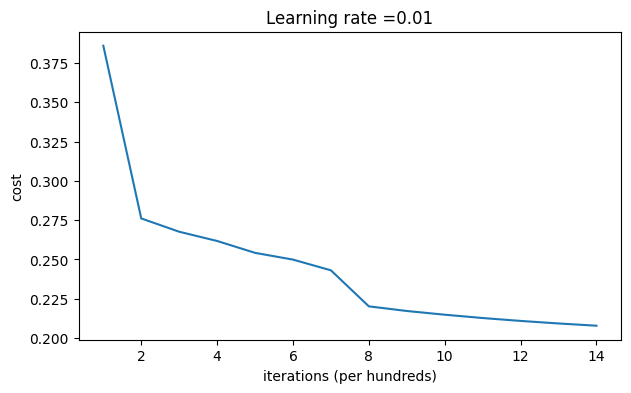

On the train set:
Accuracy: 0.8833333333333333
On the test set:
Accuracy: 0.85


In [9]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [10]:
print (predictions_train)
print (predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0
  0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0
  0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0
  0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1
  1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0
  1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1
  1 1 0 1 0 0 0 1 1 1 1 0]]
[[1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1
  0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0]]


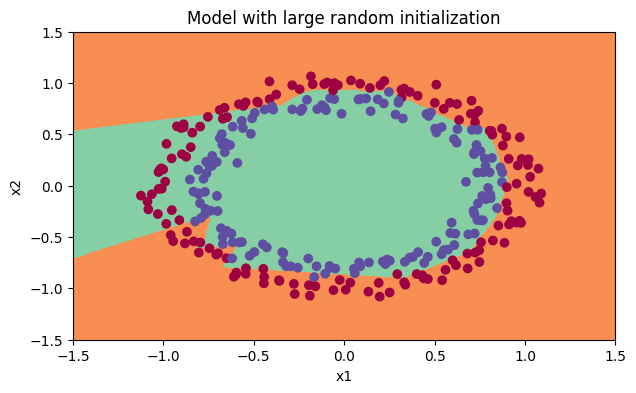

In [11]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### He Initialization

In [12]:
def initialize_parameters_he(layers_dims):
  
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):

        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2./ layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l] , 1))

        
    return parameters

Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572938
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071794
Cost after iteration 7000: 0.3117803464844441
Cost after iteration 8000: 0.23696215330322562
Cost after iteration 9000: 0.18597287209206836
Cost after iteration 10000: 0.15015556280371817
Cost after iteration 11000: 0.12325079292273552
Cost after iteration 12000: 0.09917746546525932
Cost after iteration 13000: 0.08457055954024274
Cost after iteration 14000: 0.07357895962677362


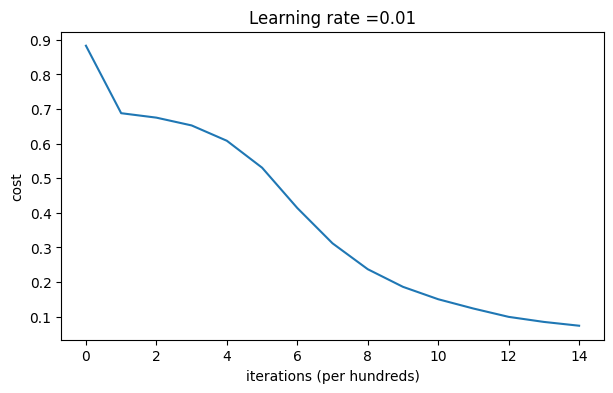

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [13]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

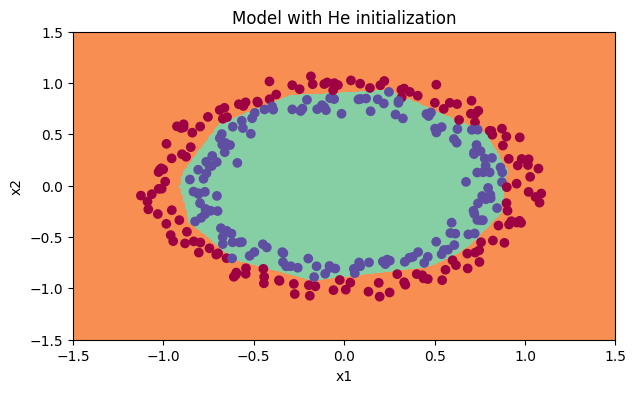

In [14]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)